In [1]:
import math
#functions
pi = math.pi
mbar = lambda u,s,m,mu: (m**4 - 2*m**2*mu**2 - m**2 * (u+s) +s*u) * (1/(s-m**2)+ 1/(u-m**2))**2 + 2 * (-mu**2*(s+u) + s*u + mu**4 +2*m**2*mu**2)/((s-m**2)*(u-m**2))
def pf(m, mu, omega, cost):
    # Numerator part
    numerator = (omega * (2 * m**2 - mu**2 + 2 * m * omega) * cost +
                 math.sqrt((m + omega)**2 * (mu**2 * (-4 * m**2 + mu**2 - 4 * m * omega) + 4 * m**2 * omega**2 * cost**2)))
    
    # Denominator part
    denominator = 2 * (m + omega)**2 - 2 * omega**2 * cost**2
    
    # Final output
    return numerator / denominator
Ek = lambda omega,cost,mu,m: (omega**2 + pf(m,mu,omega,cost)**2 -2* omega*pf(m,mu,omega,cost)*cost + mu**2)**0.5
Epf = lambda m,mu,omega,cost: (pf(m,mu,omega,cost)**2 + m**2)**0.5

dsigma = lambda m,mu,omega,cost,u,s: 1/(64*pi**2*m) *pf(m,mu,omega,cost)/omega *(Ek(omega,cost,mu,m) + Epf(m,mu,omega,cost)*(1-omega/pf(m,mu,omega,cost) * cost))**(-1) * mbar(u,s,m,mu)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


the total cross section for omega =  0.1  is  73.88066631643314 m-2
the total cross section for omega =  0.3  is  2.516696853835984 m-2
the total cross section for omega =  0.5  is  0.5072797899305541 m-2
the total cross section for omega =  0.8  is  0.10934877210071259 m-2
the total cross section for omega =  1.0  is  0.049285272220318366 m-2


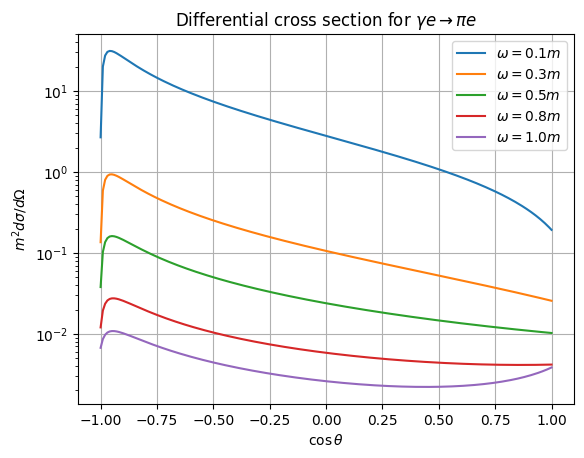

In [2]:
import numpy as np
import matplotlib.pyplot as plt
m = 1
mu = 3
omegaArr = np.array([0.1, 0.3, 0.5, 0.8, 1])# <5/4
tot_cross_sec = np.zeros(len(omegaArr))
for j in range(len(omegaArr)):
    omega = omegaArr[j]
    s = m**2 + 2*m*omega

    cost = np.array(np.linspace(-1,1,200))
    u = [m**2 + mu**2 - 2* m* Ek(omega,costi,mu,m) for costi in cost]
    dsigmaArray = np.zeros(len(cost))
    mbarArray = np.zeros(len(cost))

    for i in range(len(cost)):
        mbarArray[i] = mbar(u[i],s,m,mu)
        dsigmaArray[i] = dsigma(m,mu,omega,cost[i],u[i],s)
    plt.legend()  # Automatically uses labels from plt.plot()
    tot_cross_sec[j] = 2*pi*np.trapz(dsigmaArray,cost)
    print("the total cross section for omega = ",omega, " is ", tot_cross_sec[j], "m-2")
    plt.plot(cost, dsigmaArray, label=f'$\omega = {omega}m$')
plt.xlabel(r'$\cos\theta$')  # X-axis label
plt.ylabel(r'$m^2 d\sigma/d\Omega$')  # Y-axis label
plt.title(r'Differential cross section for $\gamma e \to \pi e$')  # Title of the plot
plt.legend()  # Show legend
plt.yscale('log',base=10) 
plt.legend()  # Automatically uses labels from plt.plot()
# Display the plot
plt.grid(True)

plt.savefig("mod_qed.pdf", format="pdf", bbox_inches="tight")